# Drying Time and Product Temperature Calculations

In [96]:
#Outputs: 
    #Drying Time Calculations
    #Product Temperature Calculations
    #Least squares Fitting of Tproduct based on Kv values and Resistance fitting(Equation 3)

In [97]:
#Libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import least_squares
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import math

## Resistance Parameters from Resistance Fitting Model

Parameters for 2NN : [2.37967969e-04 1.50500000e+05 3.92977818e+00]

Parameters for 3NN : [2.11020015e+02 1.50001112e+05 4.23697031e+00]

Parameters for 4NN : [2.30943948e-03 1.20100000e+05 4.58371880e+00]

Parameters for core : [1.42191708e-03 1.20100000e+05 3.65804215e+00]

## Product Temperature

### Load Excel Sheet

In [98]:
#Initial Data(SV File)
file_location = r'C:\Users\sbadih\OneDrive - Gilead Sciences\Trodelvy 2.0 Modelling Data\220715_GS-0132_F4_0C125mT_SV_1HR.xlsx'
assert os.path.isfile(file_location)
df = pd.read_excel(file_location,sheet_name='220715_GS-0132_F4_0C125mT_SV_1H')
print(list(df.columns))

['Timestamp', ' SPLYO.CONDENSER_TEMPERATURE.F_CV', ' SPLYO.SHELF_OUTLET.F_CV', ' SPLYO.SHELF_INLET.F_CV', ' SPLYO.SHELF_SP.F_CV', ' SPLYO.TC_AVG.F_CV', ' SPLYO.VACUUM_SP.F_CV', ' SPLYO.CHAMBER_CM.F_CV', ' SPLYO.ROUGH_VACUUM.F_CV', ' SPLYO.CHAMBER_PIRANI.F_CV', ' SPLYO.CONDENSER_VACUUM.F_CV']


In [99]:
#Load Brandy's Excel Sheet for Drying
file_location1 = r'C:\Users\sbadih\OneDrive - Gilead Sciences\Tchessalov Model\Tchessalov model spreadsheet-Find Drying Time and Product Temp.xlsx'
assert os.path.isfile(file_location1)
df1 = pd.read_excel(file_location1,sheet_name='Model 150 mgmL') #Chose random condition as a test sample

In [100]:
# Load Data(PP File)
file_location2 = r'C:\Users\sbadih\OneDrive - Gilead Sciences\Trodelvy 2.0 Modelling Data\220715_GS-0132_F4_0C125mT_PP_1HR.xlsx'
assert os.path.isfile(file_location2)
df2 = pd.read_excel(file_location2,sheet_name='220715_GS-0132_F4_0C125mT_PP_1H')
print("Headers:")
print(list(df2.columns))

Headers:
['Timestamp', ' SPLYO.TC01.F_CV', ' SPLYO.TC02.F_CV', ' SPLYO.TC03.F_CV', ' SPLYO.TC04.F_CV', ' SPLYO.TC05.F_CV', ' SPLYO.TC06.F_CV', ' SPLYO.TC07.F_CV', ' SPLYO.TC08.F_CV', ' SPLYO.TC09.F_CV', ' SPLYO.TC10.F_CV', ' SPLYO.TC11.F_CV', ' SPLYO.TC12.F_CV', ' SPLYO.TC13.F_CV', ' SPLYO.TC14.F_CV', ' SPLYO.TC15.F_CV', ' SPLYO.TC16.F_CV', ' SPLYO.TC_AVG.F_CV']


### Load Parameters

In [101]:
#Function to Calc. Sublimation Pressure
def sub_p(T): #input is temperature
    sp=(np.exp(24.01849-6144.96/((T)+273)))*1000
    return sp

In [102]:
#Extract required variables to find the start and stop index
cham_pres=((df[[' SPLYO.CHAMBER_CM.F_CV']]).values)
pirani_pres=(df[[' SPLYO.CHAMBER_PIRANI.F_CV']].values)
#Find Nested Configuration Temperatures
T_2N=(df2[[' SPLYO.TC06.F_CV']]).values
T_3N=(df2[[' SPLYO.TC03.F_CV']]).values
T_4N=(df2[[' SPLYO.TC01.F_CV']]).values
sub_pres2=sub_p(T_2N)
sub_pres3=sub_p(T_3N)
sub_pres4=sub_p(T_4N)

In [103]:
#Find Index Information(Same as Resistance Sheet)
# 2NN
minimum=[]
ind=[]
for i in range(len(cham_pres)):
    if sub_pres2[i]<98.5:
        ind.append(i)
        minimum.append(cham_pres[i]-sub_pres2[i])
minimum=np.array(minimum) #convert list to array
min_ind2=np.argmin(minimum) #Find the index in the minimum array where the minimum difference occurs
strt_ind2=ind[min_ind2] #Find the index in the sublimation pressure where the minimum occurs
# 3NN
minimum=[]
ind=[]
for i in range(len(cham_pres)):
    if sub_pres3[i]<98.5:
        ind.append(i)
        minimum.append(cham_pres[i]-sub_pres3[i])
minimum=np.array(minimum) #convert list to array
min_ind3=np.argmin(minimum) #Find the index in the minimum array where the minimum difference occurs
strt_ind3=ind[min_ind3] #Find the index in the sublimation pressure where the minimum occurs

# 4NN
minimum=[]
ind=[]
for i in range(len(cham_pres)):
    if sub_pres4[i]<98.5:
        ind.append(i)
        minimum.append(cham_pres[i]-sub_pres4[i])
minimum=np.array(minimum) #convert list to array
min_ind4=np.argmin(minimum) #Find the index in the minimum array where the minimum difference occurs
strt_ind4=ind[min_ind4] #Find the index in the sublimation pressure where the minimum occurs

print("Start Index for 2NN:",strt_ind2)
print("Start Index for 3NN:",strt_ind3)
print("Start Index for 4NN:",strt_ind4)

#Stop Index
index=[]
diff=[]
for i in range(len(pirani_pres[strt_ind2:])): #start where the primary drying starts
    if pirani_pres[strt_ind2+i]<128:
        index.append(i+strt_ind2)
   #Stop Index is the same for all vial configurations 
stop_ind=index[0] #pick the timestamp where the pirani goes close to 125. This only applies to HH cycle

tol=3
if abs(strt_ind2-strt_ind3)<tol and abs(strt_ind3-strt_ind4)<tol and abs(strt_ind2-strt_ind4)<tol:
    strt_ind=strt_ind2
    print("Strt Index:",strt_ind)
# stop_ind=67
print("Stop Index is:",stop_ind)

Start Index for 2NN: 16
Start Index for 3NN: 15
Start Index for 4NN: 15
Strt Index: 16
Stop Index is: 59


In [104]:
# #Stop Index (initial method, gave me wrong answer)
# index=[]
# diff=[]
# for i in range(len(pirani_pres[strt_ind2:])): #start where the primary drying starts
#     if cham_pres[i+strt_ind2]<100:
#         index.append(i+strt_ind2)
#         diff.append(pirani_pres[i+strt_ind2]-cham_pres[i+strt_ind2])
# diff=np.array(diff)
# min_diff=np.argmin(diff) #find index where minimum occurs
#    #Stop Index is the same for all vial configurations 
# stop_ind=index[min_diff]

#Based on Mckenzies calcs.
stop_ind=69
strt_ind=21

In [105]:
#Elapsed Time Array
time=(df[['Timestamp']]).values #every hour
cycle_time=(np.arange(0,len(time),1))[strt_ind:stop_ind] #Create array for time passed in increments of 1 hour

#Pirani Pressure
pirani_pres=((df[[' SPLYO.CHAMBER_PIRANI.F_CV']]).values)[strt_ind:stop_ind]

#Chamber Pressure
cham_pres=(((df[[' SPLYO.CHAMBER_CM.F_CV']]).values)/1000)[strt_ind:stop_ind] #This is the capacitance monometer reading(Torr)

shelf_temp=((df[[' SPLYO.SHELF_SP.F_CV']]).values)[strt_ind:stop_ind] ##Check which one this should be?
shelf_temp=shelf_temp.reshape(-1)

#Store resistance values in a 3 by 3 matrix for 2,3,4NN vial configurations
    #Note this is extracted from the resistance calculation sheets(Tchessalov Model)
cake_res_param=np.array(([2.37967969e-04,1.50500000e+05,3.92977818e+00],[2.11020015e+02,1.50001112e+05,4.23697031e+00],[2.30943948e-03,1.20100000e+05,4.58371880e+00],[1.42191708e-03,1.20100000e+05,3.65804215e+00]))

Kv_param=np.array([2.50434209e-06,-5.18465628e-05,-6.31311756e-04])
Kv_values=np.repeat(0.00020961432864185497,len(pirani_pres)) #From Kv Fitting model, doesn't change based on vial configuration
print("Kv Values Shape:",Kv_values.shape)
#0.00020961432864185497
#Input Parameters
vial_capac=20 #Using 20R vials
SAin=5.982843996
Din=2.76
Dout=3
ice_den=0.918
den=1.031
fill_volume=6.3
water_cont=0.484
dry_cake=(fill_volume*den)/(SAin*ice_den)
vial_numbers=86 #Number of filled vials only
T_critical=-20.6 #Collapse temp. in Celsius for F4
lam=0.00358 #constant

Kv Values Shape: (43,)


In [106]:
print(cycle_time)

[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58]


Note: For each cycle we run will have 3 different values of resistance and only one value for Kv(based on assumption that nearest neighbours configuration doesn't effect the Kv value).

### Heat Flux

$$hf=(ShelfTemp-Tproduct))*Kv$$

### Sublimation Heat

$$sh[i]=sh[i-1]+(hf[i]+hf[i-1])*(cycleTime[i]-cycleTime[i-1])*\frac{3600}{2}*Dout*\frac{pi}{4}$$

### Mass of Sublimed Ice

$$msi=\frac{sh}{676}$$

### Product Dried Layer

$$pdl=\frac{msi}{waterCont*iceDen*Din^2*\frac{pi}{4}}$$

### Cake Resistance

$$cakeRes=A+\frac{(B*pdl)}{(1+C*pdl)}$$

### Ice Surface Temperature

$$TempIceSurf=Tproduct-hf*\frac{dryCake-pdl}{lambda}$$

### Theoretical Pressure

$$presPred=e^\frac{24.01849-6144.96}{(Tice_surf+273)}$$

### Experimental Pressure

$$pReal=chamPres+cakeRes*3600*(\frac{Dout^2}{Din^2})*Kv*\frac{shelfTemp-Tproduct}{676}$$

### Iterative OLS approach to fit the product temperature(T_p) by backtracking from pressure calculations

In [107]:
#OLS Function
def ols_fit():
    #Define Parameter Set(Initial)
    T_p_0=(df2[[' SPLYO.TC_AVG.F_CV']]).values #Used thermocouple average as a starting point for the product temperature fitting
    T_p_0=(T_p_0.reshape(-1))[strt_ind:stop_ind]
    
    #Define Residuals Function
    def residuals(T_p): #T_p is the parameter we are fitting
        #Need to calculate initial condition for cake resistance and Tice based on initial T_p_0 guess
        #Go through all steps here
        #Define function to calculate cake resistance and Tice
        def intermed(T_p):
            hf=(shelf_temp-T_p)*Kv_values
            sh=np.zeros(hf.size)
            for i in range(len(hf)):
                if i==0:
                    sh[i]=0
                else:
                    sh[i]=sh[i-1]+(hf[i]+hf[i-1])*(cycle_time[i]-cycle_time[i-1])*3600/2*Dout*Dout*np.pi/4
            msi=sh/676
            pdl=msi/(water_cont*ice_den*Din*Din*np.pi/4)
            cake_res=(cake_res_param[2,0]+((cake_res_param[2,1]*pdl)/(1+cake_res_param[2,2]*pdl)))/1000
            Tice_surf=T_p-hf*(dry_cake-pdl)/lam
            return cake_res, Tice_surf
        outputs=intermed(T_p) #variable to store cake res and Tice_surf
        p_pred=np.exp(24.01849-6144.96/(outputs[1].astype("float64")+273.0)) #Have to set initial condition for Tice_surf
        #p_pred=np.exp(24.01849-6144.96/(outputs[0]+273.0)) #Have to set initial condition for Tice_surf
        p_real=cham_pres.reshape(-1)+outputs[0]*3600*((Dout*Dout)/(Din*Din))*Kv_values*(shelf_temp-T_p)/676 #Have to set initial condition for cake_res
        p_real=np.array(p_real, dtype=float)
        res=p_pred-p_real
        return res
    #Least Squares Fitting
    lsq=least_squares(residuals,T_p_0, loss='soft_l1', f_scale=0.1)
    
    #Fitted Product Temperature
    T_p_fit=lsq.x
    
    return T_p_fit #final outcome T_p 

Fitted Temperature from OLS:
 [-37.23814005 -28.07786889 -24.3502165  -23.00637241 -22.285967
 -21.78207973 -21.47675565 -21.22648018 -21.07153351 -20.92530861
 -20.82180476 -20.74207743 -20.68084023 -20.62383844 -20.58931905
 -20.5645905  -20.53780796 -20.52824057 -20.52458316 -20.54621151
 -20.53195307 -20.56182187 -20.57509309 -20.58152423 -20.61067707
 -20.63241915 -20.65647697 -20.6826562  -20.71078942 -20.74073174
 -20.77235728 -20.80555624 -20.84023261 -20.87630213 -20.9136907
 -20.95233306 -20.99217155 -21.02335885 -21.07521926 -21.10857095
 -21.16251074 -21.20767255 -21.25380045]


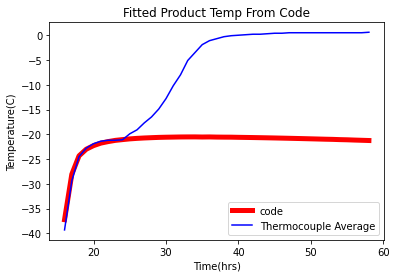

In [108]:
print("Fitted Temperature from OLS:\n",ols_fit())
plt.plot(cycle_time,ols_fit(),color="red",linewidth=5,label="code")
plt.plot(cycle_time,(df2[[' SPLYO.TC_AVG.F_CV']]).values[strt_ind:stop_ind],color="blue",label="Thermocouple Average")
plt.xlabel("Time(hrs)")
plt.ylabel("Temperature(C)")
plt.title("Fitted Product Temp From Code")
plt.legend()

Note: We do observe that in this cycle we are operating closer to the collapse temperature.

In [109]:
#Function to calculate all intermediate values used to fit the T_product
def param(T_p):
    hf=(shelf_temp-T_p)*Kv_values
    sh=np.zeros(hf.size)
    for i in range(len(hf)):
        if i==0:
            sh[i]=0
        else:
            sh[i]=sh[i-1]+(hf[i]+hf[i-1])*(cycle_time[i]-cycle_time[i-1])*3600/2*Dout*Dout*np.pi/4
    msi=sh/676
    pdl=msi/(water_cont*ice_den*Din*Din*np.pi/4)
    cake_res=(cake_res_param[2,0]+((cake_res_param[2,1]*pdl)/(1+cake_res_param[2,2]*pdl)))/1000 #Want cake resistance in Torr
    Tice_surf=T_p-hf*(dry_cake-pdl)/lam
    return cake_res, Tice_surf, hf, msi, sh, pdl

In [110]:
#Calculate all outputs of our model using the fitted Tproduct 

#T product
T_p_model=ols_fit()
#Heat Flux
hf_model=param(ols_fit())[2]
#Sublimation Heat
sh_model=param(ols_fit())[4]
#Mass of Sublimed Ice 
msi_model=param(ols_fit())[3]
#Product Dried Layer
pdl_model=param(ols_fit())[5]
#Cake Resistance
cake_res_model=param(ols_fit())[0]
#Tice_surf
Tice_model=param(ols_fit())[1]
#Pressure(Experimental)
p_exp_model=cham_pres.reshape(-1)+(param(ols_fit()))[0]*3600*((Dout*Dout)/(Din*Din))*Kv_values*(shelf_temp-ols_fit())/676
#Pressure(Theoretical)
p_theo_model=np.exp(24.01849-6144.96/((param(ols_fit()))[1].astype("float64")+273))

In [111]:
print(param(ols_fit())[0])

[2.30943948e-06 4.65002672e+00 9.40766455e+00 1.22819385e+01
 1.42399274e+01 1.56799309e+01 1.67919094e+01 1.76808522e+01
 1.84099496e+01 1.90200757e+01 1.95387097e+01 1.99856409e+01
 2.03751394e+01 2.07177794e+01 2.10217194e+01 2.12933657e+01
 2.15376483e+01 2.17585808e+01 2.19594663e+01 2.21430483e+01
 2.23114284e+01 2.24664497e+01 2.26097334e+01 2.27424910e+01
 2.28658872e+01 2.29809195e+01 2.30883974e+01 2.31890516e+01
 2.32835209e+01 2.33723658e+01 2.34560807e+01 2.35351033e+01
 2.36098224e+01 2.36805846e+01 2.37477001e+01 2.38114473e+01
 2.38720767e+01 2.39298012e+01 2.39848399e+01 2.40373783e+01
 2.40875851e+01 2.41356248e+01 2.41816263e+01]


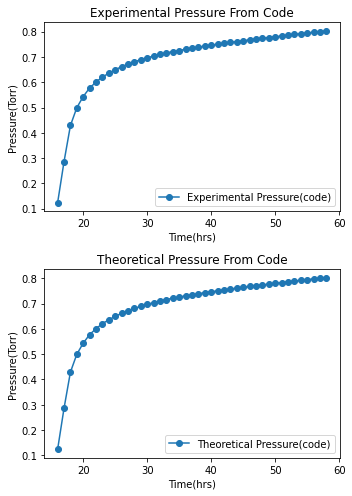

In [112]:
#Plot
plt.figure(figsize=(5, 7))
plt.subplot(2,1,1)
plt.plot(cycle_time,p_exp_model,marker="o",label="Experimental Pressure(code)")
plt.xlabel("Time(hrs)")
plt.ylabel("Pressure(Torr)")
plt.title("Experimental Pressure From Code")
plt.legend()
plt.subplot(2,1,2)
plt.plot(cycle_time,p_theo_model,marker="o",label="Theoretical Pressure(code)")
plt.xlabel("Time(hrs)")
plt.ylabel("Pressure(Torr)")
plt.title("Theoretical Pressure From Code")
plt.legend()
plt.tight_layout()

In [113]:
#### Checkpoint(SSE) #####

def sse(x1,x2):
    sse=[]
    for i in range(len(x1)):
        sse.append(math.pow(x1[i]-x2[i],2))
    sse=np.array(sse)
    return np.sum(sse)
print("SSE for Theoretical Vs Experimental Pressures(Model):",sse(p_theo_model,p_exp_model))

SSE for Theoretical Vs Experimental Pressures(Model): 1.544147073721521e-24


## Drying Time

In [114]:
#Sublimation Rate Function
def sub_rate(HF):
    sr=np.zeros(HF.size)
    for i in range(len(HF)):
        if i==0:
            sr[i]=0
        else:
            sr[i]=vial_numbers*HF[i]*np.pi*math.pow(Dout,2)/(4*676)
    return sr

In [115]:
#Sublimation Rate Calculation
sr=sub_rate(param(ols_fit())[2]) #g/s
sr_kg=sr*3600/1000

In [116]:
#Percent Removed Water Function
def perc_wat():
    prw = ((((param(ols_fit()))[3]/water_cont)/fill_volume)/den)*100
    return prw 

In [117]:
#Percent Removed Water Calculation
prw_old=perc_wat()
ind=[]
for i in range(len(prw_old)):
    if prw_old[i]>100:
        ind.append(i)
prw=np.delete(prw_old,ind) #drop values that exceed 100
print(prw)

[ 0.          3.98027539 10.33396645 16.27709334 21.96116236 27.49158589
 32.92045553 38.27959889 43.58788794 48.85838076 54.09753328 59.31369076
 64.51215758 69.6957857  74.86792817 80.03263517 85.19087767 90.34455834
 95.49657934]


Pmin Parameters: [5.12 18.829 0]


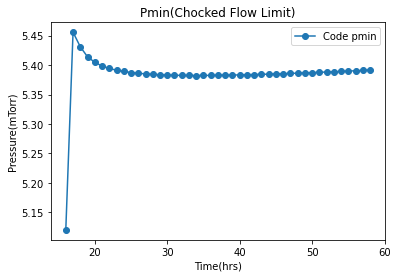

In [118]:
#Pmin (Chocked Flow) Calculation

#Load a,b,c parameters (these are the ones we will use for our model)
p_min_param=df1.iloc[3:6,13].values
print("Pmin Parameters:",p_min_param)
p_min_model=p_min_param[0]+p_min_param[1]*sr_kg+p_min_param[2]*sr_kg*sr_kg
plt.plot(cycle_time,p_min_model,marker="o",label="Code pmin")
plt.title("Pmin(Chocked Flow Limit)")
plt.xlabel("Time(hrs)")
plt.ylabel("Pressure(mTorr)")
plt.legend()

### Final Graphs Output

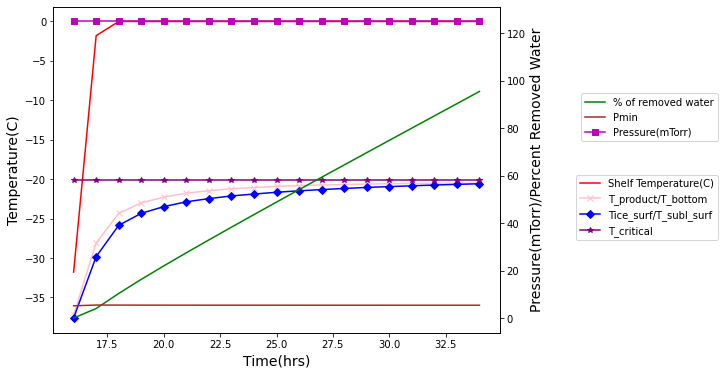

In [119]:
#Plot Final Graph For combined Pressures and Temperatures
pressure=125 #only for high high cycles
l=len(prw)
fig,ax = plt.subplots( figsize=(8,6) )
#Temperature axis
ax.plot(cycle_time[0:l],
        shelf_temp[0:l],
        color="red",label="Shelf Temperature(C)")
ax.plot(cycle_time[0:l],
        ols_fit()[0:l],
        color="pink",marker="x",label="T_product/T_bottom") #T_product/T_bottom
ax.plot(cycle_time[0:l],
        (param(ols_fit()))[1][0:l],
        color="blue",marker="D",label="Tice_surf/T_subl_surf") #Tice_surf/T_subl_surf
#Change this to real T critical
ax.plot(cycle_time[0:l],
        np.repeat(-20.1,cycle_time.shape[0])[0:l],
        color="purple",marker="*",label="T_critical") #Tcritical
ax.set_xlabel("Time(hrs)", fontsize = 14)
ax.set_ylabel("Temperature(C)", fontsize = 14)
plt.legend(bbox_to_anchor=(1.5,0.5))

#Pressure Axis
ax2=ax.twinx()
ax2.plot(cycle_time[0:l],prw,color="green",label="% of removed water") #Percent Removed Water
ax2.plot(cycle_time[0:l],p_min_model[0:l],color="brown",label="Pmin") #pmin
ax2.plot(cycle_time[0:l],np.repeat(pressure,cycle_time.shape[0])[0:l],color="m",marker="s",label="Pressure(mTorr)") #pressure

ax2.set_ylabel("Pressure(mTorr)/Percent Removed Water", fontsize = 14)
plt.legend(bbox_to_anchor=(1.5,0.75))
plt.show()

# save the plot as a file
#fig.savefig('Final_Output1.jpg',format='jpeg')

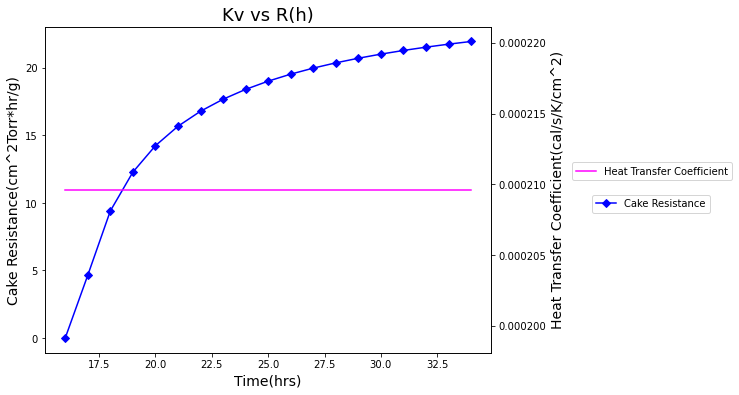

In [120]:
#Plot graph for Kv vs Rh
fig,ax = plt.subplots( figsize=(8,6) )
#Temperature axis
ax.plot(cycle_time[0:l],
        cake_res_model[0:l],
        color="blue",marker="D",label="Cake Resistance")
ax.set_xlabel("Time(hrs)", fontsize = 14)
ax.set_ylabel("Cake Resistance(cm^2Torr*hr/g)", fontsize = 14)
plt.legend(bbox_to_anchor=(1.5,0.5))
ax2=ax.twinx()
ax2.plot(cycle_time[0:l],Kv_values[0:l],color="magenta",label="Heat Transfer Coefficient") #Percent Removed Water
ax2.set_ylabel("Heat Transfer Coefficient(cal/s/K/cm^2)", fontsize = 14)
plt.legend(bbox_to_anchor=(1.55,0.6))
plt.title("Kv vs R(h)",fontsize=18)
plt.show()
# save the plot as a file
#fig.savefig('Final_Output2.jpg',format='jpeg')

In [121]:
#Extract Drying Time 

#Method 1: Using percent water removed
diff=[]
for i in range(len(prw)):
    if 100-prw[i]>0:
        diff.append(100-prw[i])
min_index=np.argmin(np.array(diff)) #Find index where percent of removed water is closest to 100
drying_time=cycle_time[min_index]
print("Drying Time Using Percent Removed Water:",drying_time,"(Hrs)")

# #Method 2: Using pirani and chamber pressure convergence
# drying_time_other=cycle_time[cycle_time.shape[0]-1] #Use stop index that indicated convergence of pressures
# print("Drying Time Using Pressure Convergence:",drying_time_other,"(Hrs)")

Drying Time Using Percent Removed Water: 34 (Hrs)
